In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("princelv84/dogsvscats")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'dogsvscats' dataset.
Path to dataset files: /kaggle/input/dogsvscats


In [22]:
import shutil

shutil.copytree("/kaggle/input/dogsvscats/train", "/content/train")

'/content/train'

In [23]:

shutil.copytree("/kaggle/input/dogsvscats/test", "/content/test")

'/content/test'

In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [25]:
#generators (used to process large amount of data what it deos is it divides dataset into batches of
            #input)

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
#Normalize (numpy ma value are from 0 to 255 so we have to make 0-1)
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)



In [28]:
# Create CNN model

model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


#making conv conv pool makes it such that no critical data are lost during pooling
# and makes for better feature extraction


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 252, 252, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 124, 124, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 122, 122, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 59, 59, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 57, 57, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             

 Total params: 10,646,561 (40.61 MB)

 Trainable params: 10,644,641 (40.61 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [32]:
history = model.fit(train_ds,validation_data=validation_ds,epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 209ms/step - accuracy: 0.5524 - loss: 2.0365 - val_accuracy: 0.6456 - val_loss: 0.6293
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.6471 - loss: 0.6253 - val_accuracy: 0.6972 - val_loss: 0.5746
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.7252 - loss: 0.5466 - val_accuracy: 0.6908 - val_loss: 0.6760
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.7841 - loss: 0.4630 - val_accuracy: 0.8032 - val_loss: 0.4234
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.8307 - loss: 0.3814 - val_accuracy: 0.8480 - val_loss: 0.3479
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.8730 - loss: 0.2925 - val_accuracy: 0.8650 - val_loss: 0.3227
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.9049 - loss: 0.2263 - val_accuracy: 0.8938 - val_loss: 0.2618
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.9269 -

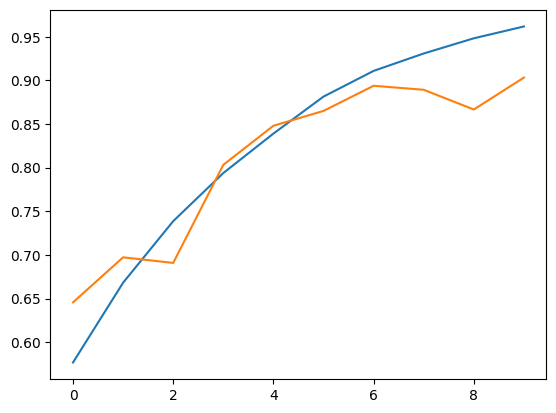

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [55]:
import os
import numpy as np
import tensorflow as tf

image_dir = "/content/Unseen"

images = []
image_names = []

for filename in os.listdir(image_dir):
    if filename.lower().endswith((".jpg", ".png", ".jpeg",'webp')):
        img_path = os.path.join(image_dir, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(256,256))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255.0
        images.append(img)
        image_names.append(filename)

images = np.array(images)

In [57]:
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


In [58]:
labels = ["Cat", "Dog"]

for i, pred in enumerate(predictions):
    predicted_class = 1 if pred > 0.5 else 0
    print(image_names[i], "→", labels[predicted_class])

dog6.webp → Dog
cat4.webp → Cat
cat5.webp → Cat
cat.webp → Cat
cat3.webp → Cat
cat2.webp → Cat
dog3.webp → Dog
dog.webp → Dog
dog7.webp → Dog
dog8.webp → Dog
cat8.webp → Cat
cat6.webp → Dog
cat7.webp → Cat
dog2.webp → Dog
dog5.webp → Dog
dog4.webp → Dog
